<a href="https://colab.research.google.com/github/ashiqur9/miniproject/blob/master/Face_Recognition_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import Necessary modeule 
from tensorflow import keras
 
from tensorflow.keras.layers import Flatten, Dense, Input, AveragePooling2D, MaxPooling2D, Conv2D, Dropout, BatchNormalization
 
import pandas as pd
 
from tensorflow.keras.regularizers import l2

In [0]:

#Read Dataset
data=pd.read_pickle('/content/drive/My Drive/Dataset/Avengers.pkl')

In [0]:

#Load Dataset
x_train=data['train_images']
y_train=data['train_labels']
x_test=data['test_images']
y_test=data['test_labels']
target=data['target']

In [0]:
x_train.shape

(51435, 128, 128, 3)

In [0]:
#Construct Sequential Model 
model =keras.models.Sequential()
 
model.add(Input(shape=x_train[0].shape))
 
model.add(Conv2D(32,kernel_size=(3,3) ))
 
model.add(keras.layers.BatchNormalization())
 
model.add(keras.layers.Activation(keras.activations.elu))
 
model.add(AveragePooling2D(2))
 
model.add(Conv2D(64,kernel_size=(2,2)))
 
model.add(keras.layers.BatchNormalization())
 
model.add(keras.layers.Activation(keras.activations.elu))
 
model.add(AveragePooling2D(2))
 
model.add(Conv2D(128,kernel_size=(2,2)))
 
model.add(keras.layers.BatchNormalization())
 
model.add(keras.layers.Activation(keras.activations.elu))
 
model.add(AveragePooling2D(2))
 
model.add(Conv2D(256,kernel_size=(2,2) ))
 
model.add(keras.layers.BatchNormalization())
 
model.add(keras.layers.Activation(keras.activations.elu))
 
model.add(AveragePooling2D(2))
 
model.add(Dropout(0.5))
 
model.add(Flatten())
 
model.add(Dense(4000,kernel_initializer='he_normal'))
 
model.add(Dropout(0.5))
 
model.add(Dense(400,kernel_initializer='he_normal'))
 
model.add(Dense(7,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 64)       

In [0]:

#Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Nadam() ,
metrics=['accuracy'])

In [0]:

#Callbacks
  my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Dataset/modelface.h5')
]

In [0]:
#Fit the model 
history=model.fit(x_train,y_train,epochs=25,batch_size=32,validation_data=(x_test,y_test),callbacks=my_callbacks,verbose=1)

Epoch 1/25
1608/1608 [==============================] - 60s 38ms/step - loss: 2.9086 - accuracy: 0.6341 - val_loss: 0.5056 - val_accuracy: 0.7857
Epoch 2/25
1608/1608 [==============================] - 60s 37ms/step - loss: 0.7639 - accuracy: 0.7591 - val_loss: 0.5464 - val_accuracy: 0.8143
Epoch 3/25
1608/1608 [==============================] - 60s 37ms/step - loss: 0.7304 - accuracy: 0.7942 - val_loss: 0.3134 - val_accuracy: 0.8810
Epoch 4/25
1608/1608 [==============================] - 60s 38ms/step - loss: 0.8347 - accuracy: 0.8082 - val_loss: 0.5788 - val_accuracy: 0.8810
Epoch 5/25
1608/1608 [==============================] - 60s 37ms/step - loss: 0.7489 - accuracy: 0.8420 - val_loss: 0.2242 - val_accuracy: 0.9143
Epoch 6/25
1608/1608 [==============================] - 60s 37ms/step - loss: 0.6138 - accuracy: 0.8645 - val_loss: 0.9542 - val_accuracy: 0.9048
Epoch 7/25
1608/1608 [==============================] - 61s 38ms/step - loss: 0.4433 - accuracy: 0.8889 - val_loss: 0.2113 -

In [0]:
 model.save('/content/drive/My Drive/Dataset/Avengers.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


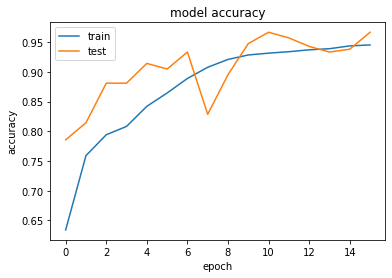

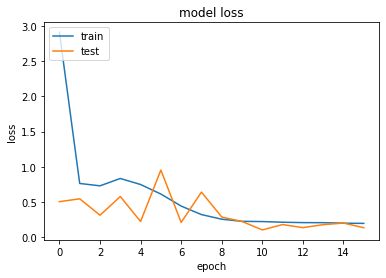

In [0]:
#Visualize Accuracy and loss 
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()